# Muon Efficiency Scale Factors Extraction

## Overview
This notebook extracts muon efficiency scale factors from ROOT files containing tag-and-probe histograms. It processes efficiency data for two muon ID criteria:
- **Isolation (ISO)**: Tight muon isolation selection efficiency
- **Tight ID**: Tight muon identification selection efficiency

## Purpose
The efficiency scale factors are extracted as functions of muon pseudorapidity (η) and transverse momentum (pT). These factors are essential for correcting the simulated Monte Carlo (MC) predictions to match the data observations in the H→WW analysis using NanoAOD format.

## Inputs
- `NUM_TightHWW_ISO_DEN_TightHWW_eta_pt.root`: Contains 2D histograms of isolation efficiency
- `NUM_TightHWW_DEN_TrackerMuons_eta_pt.root`: Contains 2D histograms of tight ID efficiency

## Outputs
Four text files containing efficiency values binned in η-pT space:
1. `Muon_ISO_effDATA.txt` - Isolation efficiency from data
2. `Muon_ISO_effMC.txt` - Isolation efficiency from MC
3. `Muon_tight_effDATA.txt` - Tight ID efficiency from data
4. `Muon_tight_effMC.txt` - Tight ID efficiency from MC

## Workflow
1. Load and organize ROOT files from auxiliary directory
2. Extract relevant 2D histograms for data and MC
3. Visualize efficiency distributions using HEPPlot style
4. Export histograms to formatted text files for downstream analysis

In [1]:
import os
import sys
import time 
from pathlib import Path

import uproot
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep


print("All import loaded")

All import loaded


In [2]:
# client = Client("tls://localhost:8786")

In [3]:
# client.close()

In [4]:
HOME_DIR = Path(os.environ.get("HOME", "/home/cms-jovyan"))
PROJECT_NAME = "H-to-WW-NanoAOD-analysis"

PROJECT_DIR = HOME_DIR / PROJECT_NAME
AUX_DIR = PROJECT_DIR / "Auxillary_files"
OUTPUT_DIR = PROJECT_DIR / "notebooks/Data-MC_corrections"

print(f"HOME_DIR:         {HOME_DIR}")
print(f"PROJECT_DIR:     {PROJECT_DIR}")
print(f"AUX_DIR:         {AUX_DIR}")
print(f"Output_DIR:         {OUTPUT_DIR}")


HOME_DIR:         /home/cms-jovyan
PROJECT_DIR:     /home/cms-jovyan/H-to-WW-NanoAOD-analysis
AUX_DIR:         /home/cms-jovyan/H-to-WW-NanoAOD-analysis/Auxillary_files
Output_DIR:         /home/cms-jovyan/H-to-WW-NanoAOD-analysis/notebooks/Data-MC_corrections


In [5]:
for files in os.listdir(AUX_DIR):
    if files.endswith("root"):
        print(f"- {files}")

- NUM_TightHWW_ISO_DEN_TightHWW_eta_pt.root
- NUM_TightHWW_DEN_TrackerMuons_eta_pt.root


In [6]:
iso_root_file = "NUM_TightHWW_ISO_DEN_TightHWW_eta_pt.root"
tID_root_file = "NUM_TightHWW_DEN_TrackerMuons_eta_pt.root"
iso_file_path = AUX_DIR/ iso_root_file
tight_file_path = AUX_DIR/ tID_root_file

# with uproot.open(iso_root_file) as iso
iso = uproot.open(iso_file_path)
tight= uproot.open(tight_file_path)

In [7]:
# print(iso.classnames())

## Isolation Efficiency Extraction

This section extracts the muon isolation efficiency from the root file. 
The isolation efficiency describes the fraction of muons passing the tight isolation criterion 
as a function of their η and pT. We extract both data and MC efficiencies for subsequent scale factor calculation.



In [8]:
for name, classname in iso.classnames().items():    
    if ("data" in name.lower()) or ("mc" in name.lower()):
        print(f"-{name:<75} | {classname}")


-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData;1                       | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_AltSig;1                | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_AltSig_syst;1           | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_combined_syst;1         | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massBin;1               | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massBin_syst;1          | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massRange;1             | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_massRange_syst;1        | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_stat;1                  | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_syst;1                  | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_tagIso;1                | TH2F
-NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData_tagIso_syst;1          

---
The three histograms which seems useful are:
- NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData
- NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyMC

### Data Isolation Efficiency

**Description:** 2D histogram of isolation efficiency measured in collision data.
This represents the true efficiency of the tight isolation selection on real proton-proton collision events.

**Processing:** The histogram is converted to text format with explicit η and pT bin boundaries for easy integration into analysis code.

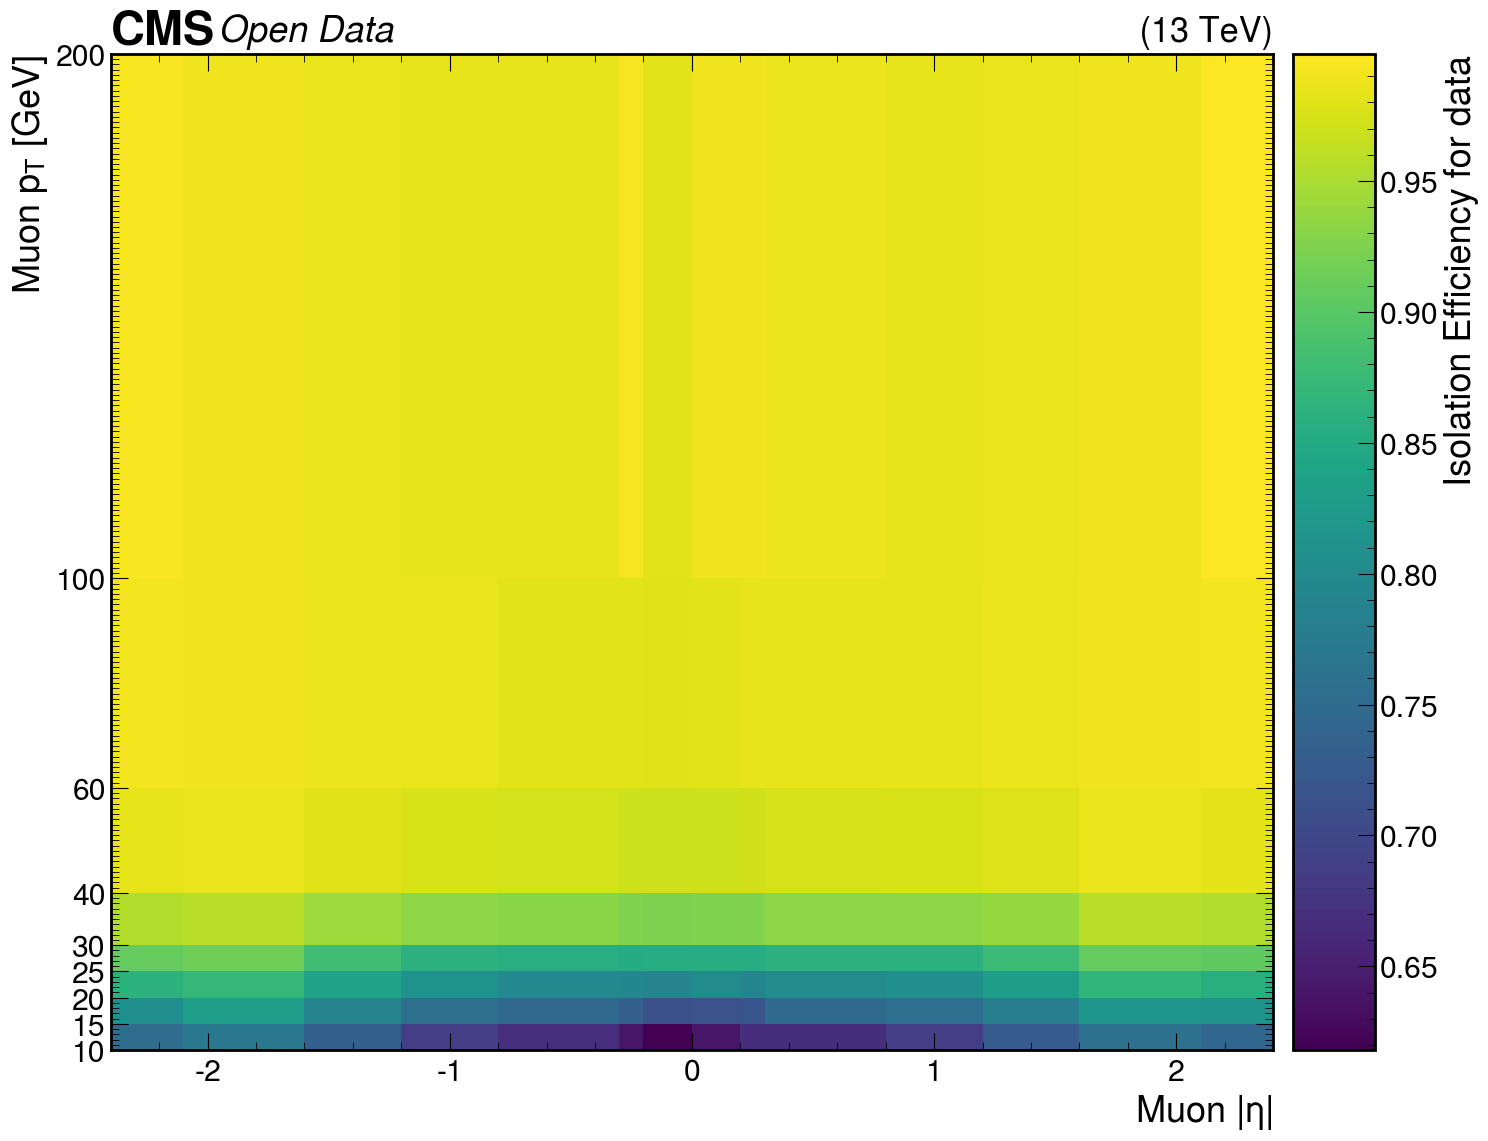

In [9]:
hep.style.use("CMS")

iso_effdata_hist = iso['NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyData'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(iso_effdata_hist,ax= ax, cbar = True, cmap= "viridis")

mesh.cbar.set_label("Isolation Efficiency for data", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
ax.set_xlabel(r"Muon $|\eta|$")
ax.set_ylabel(r"Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()



In [10]:

output_filename = "Muon_ISO_effDATA.txt"

output_path = os.path.join(OUTPUT_DIR, output_filename)

os.makedirs(OUTPUT_DIR, exist_ok=True)

values = iso_effdata_hist.values()
eta_edges = iso_effdata_hist.axes[0].edges
pt_edges = iso_effdata_hist.axes[1].edges

with open(output_path, "w") as f:
    f.write(f"{'eta_low':>10} {'eta_high':>10} {'pt_low':>10} {'pt_high':>10} {'efficiency':>12}\n")
    
    for i in range(len(eta_edges) - 1):
        eta_low = eta_edges[i]
        eta_high = eta_edges[i+1]
        
        for j in range(len(pt_edges) - 1):
            pt_low = pt_edges[j]
            pt_high = pt_edges[j+1]
            
            eff = values[i, j]
            
            f.write(f"{eta_low:>10.3f} {eta_high:>10.3f} {pt_low:>10.1f} {pt_high:>10.1f} {eff:>12.6f}\n")

print(f"Successfully saved to: {output_path}")

Successfully saved to: /home/cms-jovyan/H-to-WW-NanoAOD-analysis/notebooks/Data-MC_corrections/Muon_ISO_effDATA.txt


### MC Isolation Efficiency

**Description:** 2D histogram of isolation efficiency from simulated Monte Carlo events.
The MC efficiency is typically higher than data due to differences in detector simulation and reconstruction algorithms.

**Scale Factor Calculation:** The data/MC ratio will be used to correct MC predictions: SF_ISO = eff_DATA / eff_MC

**Processing:** Similar to data, the histogram is exported to a structured text file for further analysis.

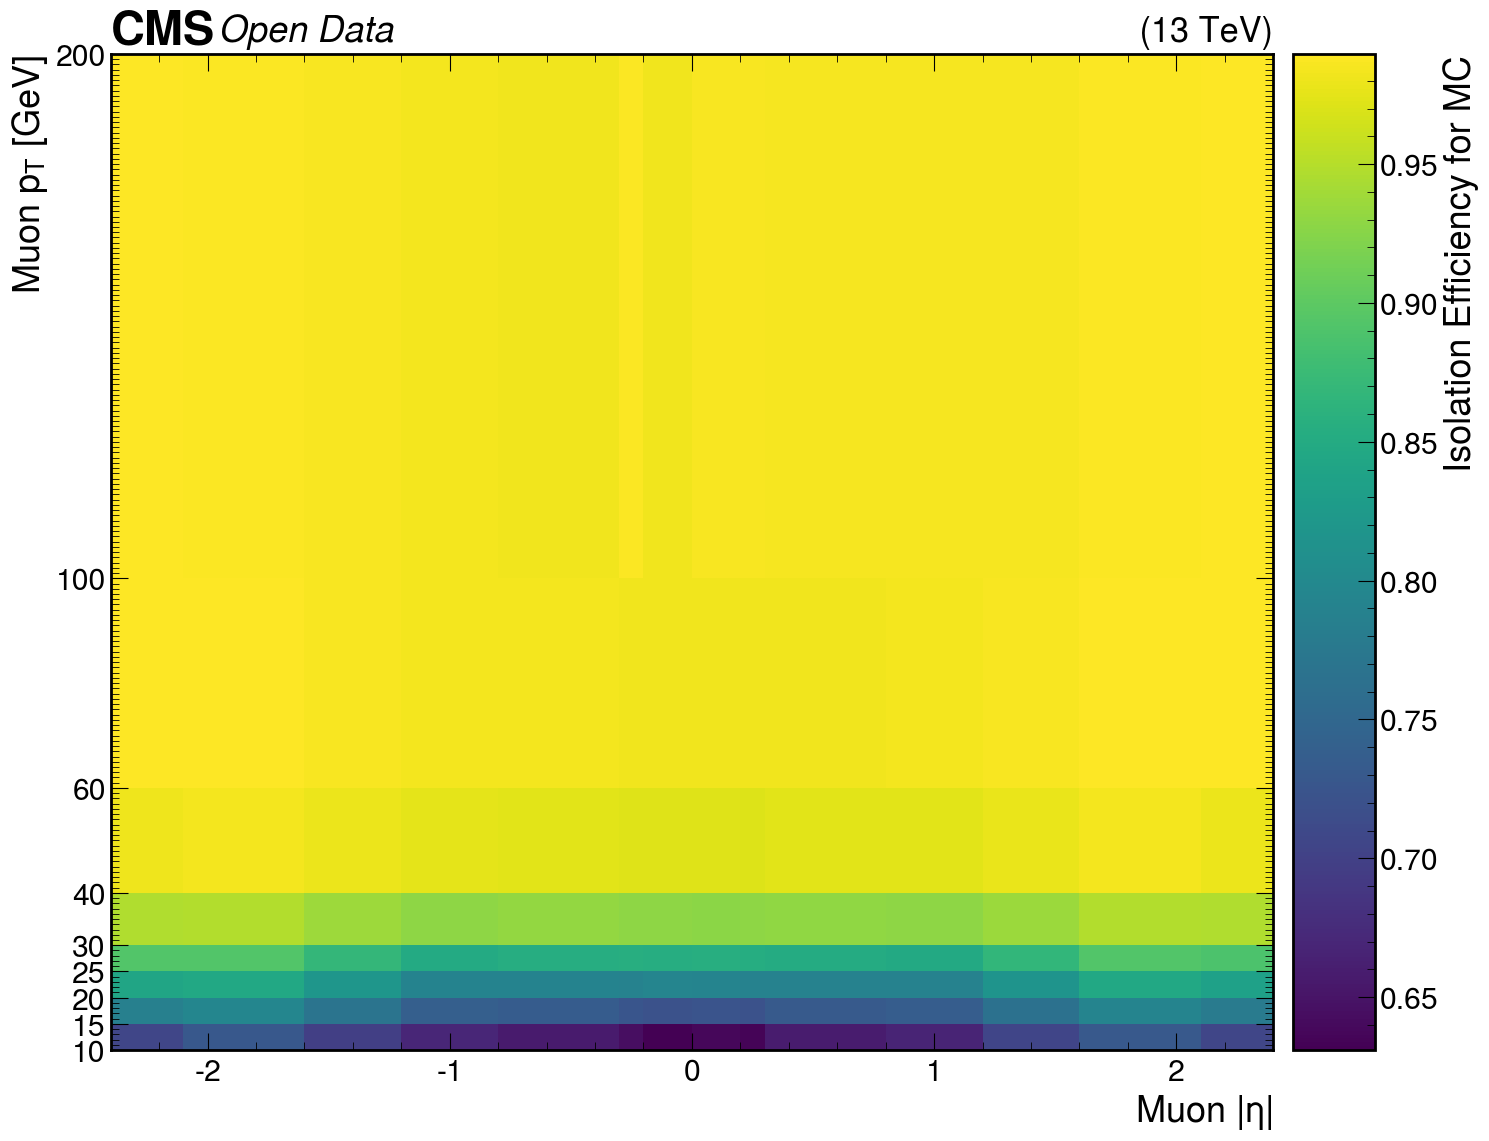

In [11]:
# hep.style.use("CMS")

iso_effMC = iso['NUM_TightHWW_ISO_DEN_TightHWW_eta_pt_efficiencyMC'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(iso_effMC,ax= ax, cbar = True, cmap= "viridis")
mesh.cbar.set_label("Isolation Efficiency for MC", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
# ax.set_xlabel()
ax.set_xlabel("Muon |$\\eta$|")
ax.set_ylabel("Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()



In [12]:

output_filename = "Muon_ISO_effMC.txt"

output_path = os.path.join(OUTPUT_DIR, output_filename)

os.makedirs(OUTPUT_DIR, exist_ok=True)

values = iso_effMC.values()
eta_edges = iso_effMC.axes[0].edges
pt_edges = iso_effMC.axes[1].edges

with open(output_path, "w") as f:
    f.write(f"{'eta_low':>10} {'eta_high':>10} {'pt_low':>10} {'pt_high':>10} {'efficiency':>12}\n")
    
    for i in range(len(eta_edges) - 1):
        eta_low = eta_edges[i]
        eta_high = eta_edges[i+1]
        
        for j in range(len(pt_edges) - 1):
            pt_low = pt_edges[j]
            pt_high = pt_edges[j+1]
            
            eff = values[i, j]
            
            f.write(f"{eta_low:>10.3f} {eta_high:>10.3f} {pt_low:>10.1f} {pt_high:>10.1f} {eff:>12.6f}\n")

print(f"Successfully saved to: {output_path}")

Successfully saved to: /home/cms-jovyan/H-to-WW-NanoAOD-analysis/notebooks/Data-MC_corrections/Muon_ISO_effMC.txt


## Tight Identification Efficiency Extraction

This section extracts the muon tight identification (ID) efficiency from the corresponding root file.
The tight ID efficiency describes the fraction of tracker muons passing the tight muon identification criteria 
as a function of their η and pT. Like the isolation efficiency, we extract both data and MC efficiencies.

### Tight ID Efficiency Analysis

In [13]:
for name, classname in tight.classnames().items():    
    if ("data" in name.lower()) or ("mc" in name.lower()):
        print(f"-{name:<75} | {classname}")


-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData;1                       | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_AltSig;1                | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_AltSig_syst;1           | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_combined_syst;1         | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massBin;1               | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massBin_syst;1          | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massRange;1             | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_massRange_syst;1        | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_stat;1                  | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_syst;1                  | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_tagIso;1                | TH2F
-NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData_tagIso_syst;1          

### MC Tight ID Efficiency

**Description:** 2D histogram of tight muon identification efficiency from Monte Carlo simulation.
This represents the efficiency of tight ID selection on simulated events, as a function of η and pT.

**Note:** The tight ID efficiency is typically lower than isolation efficiency as it applies stricter quality criteria on the muon reconstruction.

**Processing:** The histogram is converted to the same text format as the isolation efficiencies for consistency.

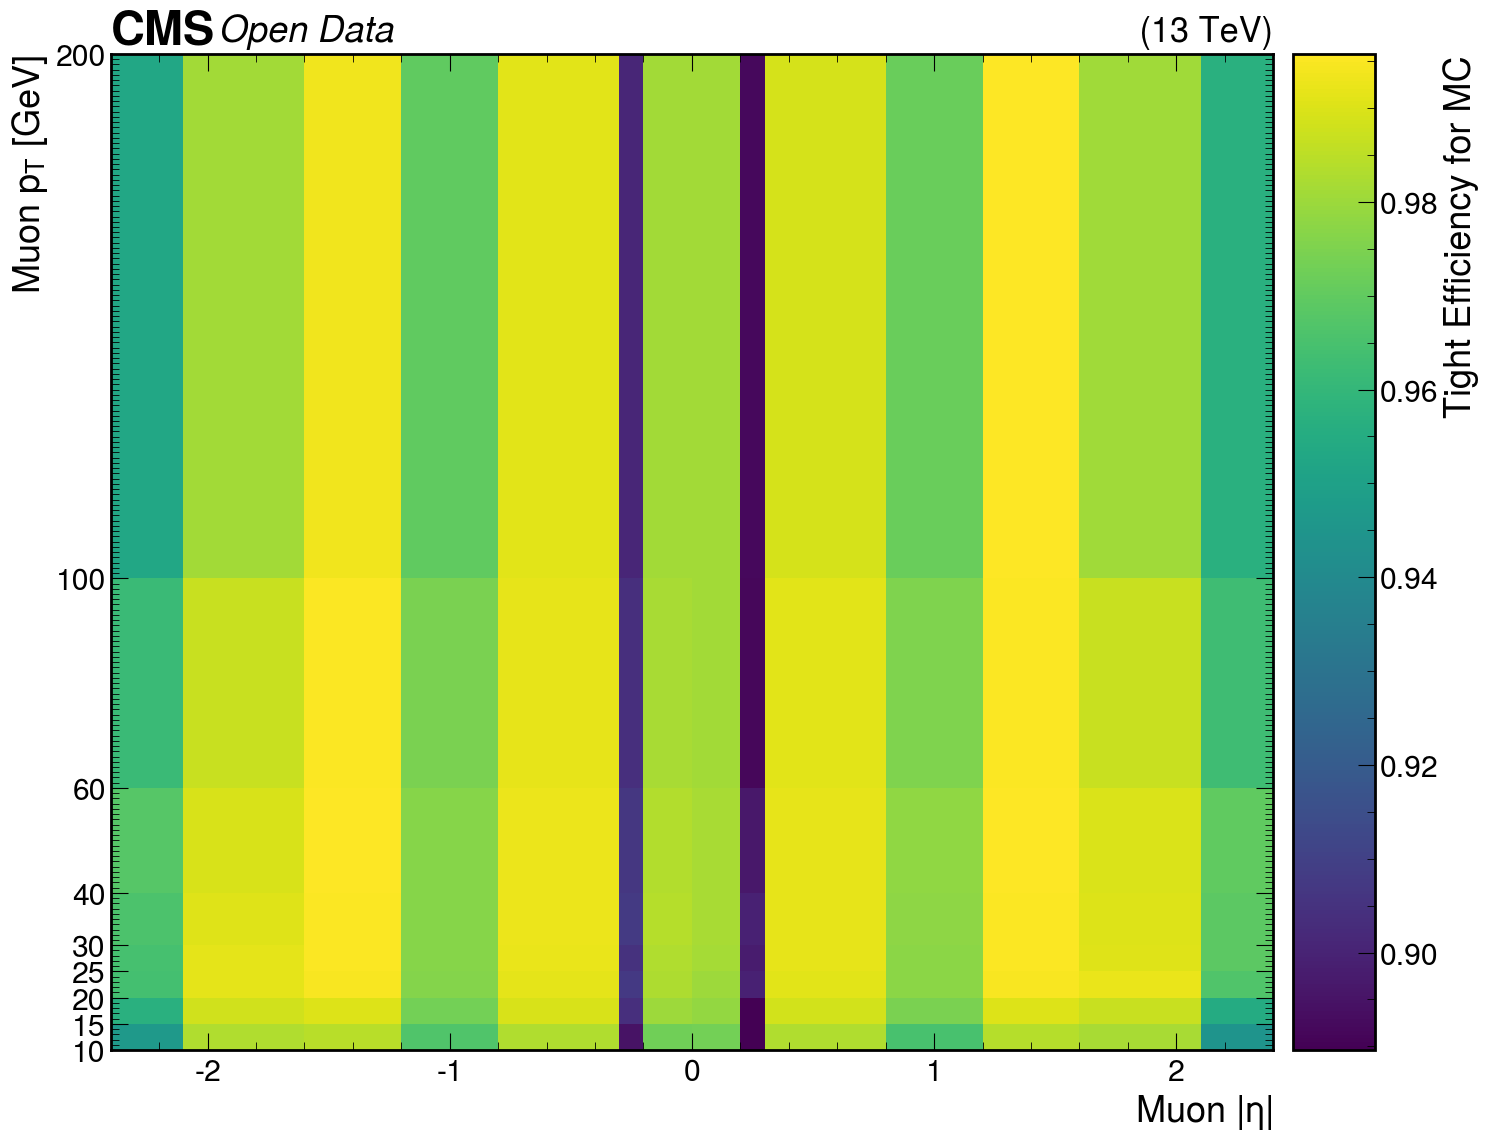

In [14]:

tight_effMC = tight['NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyMC'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(tight_effMC,ax= ax, cbar = True, cmap= "viridis")
mesh.cbar.set_label("Tight Efficiency for MC", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
# ax.set_xlabel()
ax.set_xlabel("Muon |$\\eta$|")
ax.set_ylabel("Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()


In [15]:

output_filename = "Muon_tight_effMC.txt"

output_path = os.path.join(OUTPUT_DIR, output_filename)

os.makedirs(OUTPUT_DIR, exist_ok=True)

values = tight_effMC.values()
eta_edges = tight_effMC.axes[0].edges
pt_edges = tight_effMC.axes[1].edges

with open(output_path, "w") as f:
    f.write(f"{'eta_low':>10} {'eta_high':>10} {'pt_low':>10} {'pt_high':>10} {'efficiency':>12}\n")
    
    for i in range(len(eta_edges) - 1):
        eta_low = eta_edges[i]
        eta_high = eta_edges[i+1]
        
        for j in range(len(pt_edges) - 1):
            pt_low = pt_edges[j]
            pt_high = pt_edges[j+1]
            
            eff = values[i, j]
            
            f.write(f"{eta_low:>10.3f} {eta_high:>10.3f} {pt_low:>10.1f} {pt_high:>10.1f} {eff:>12.6f}\n")

print(f"Successfully saved to: {output_path}")

Successfully saved to: /home/cms-jovyan/H-to-WW-NanoAOD-analysis/notebooks/Data-MC_corrections/Muon_tight_effMC.txt


### Data Tight ID Efficiency

**Description:** 2D histogram of tight muon identification efficiency measured in real collision data.
This provides the true efficiency of the tight ID selection under actual detector conditions.

**Scale Factor Calculation:** The data/MC scale factor for tight ID: SF_TIGHTID = eff_DATA / eff_MC

**Processing:** The final histogram is exported to text format, completing the extraction of all necessary efficiency scale factors for the analysis.

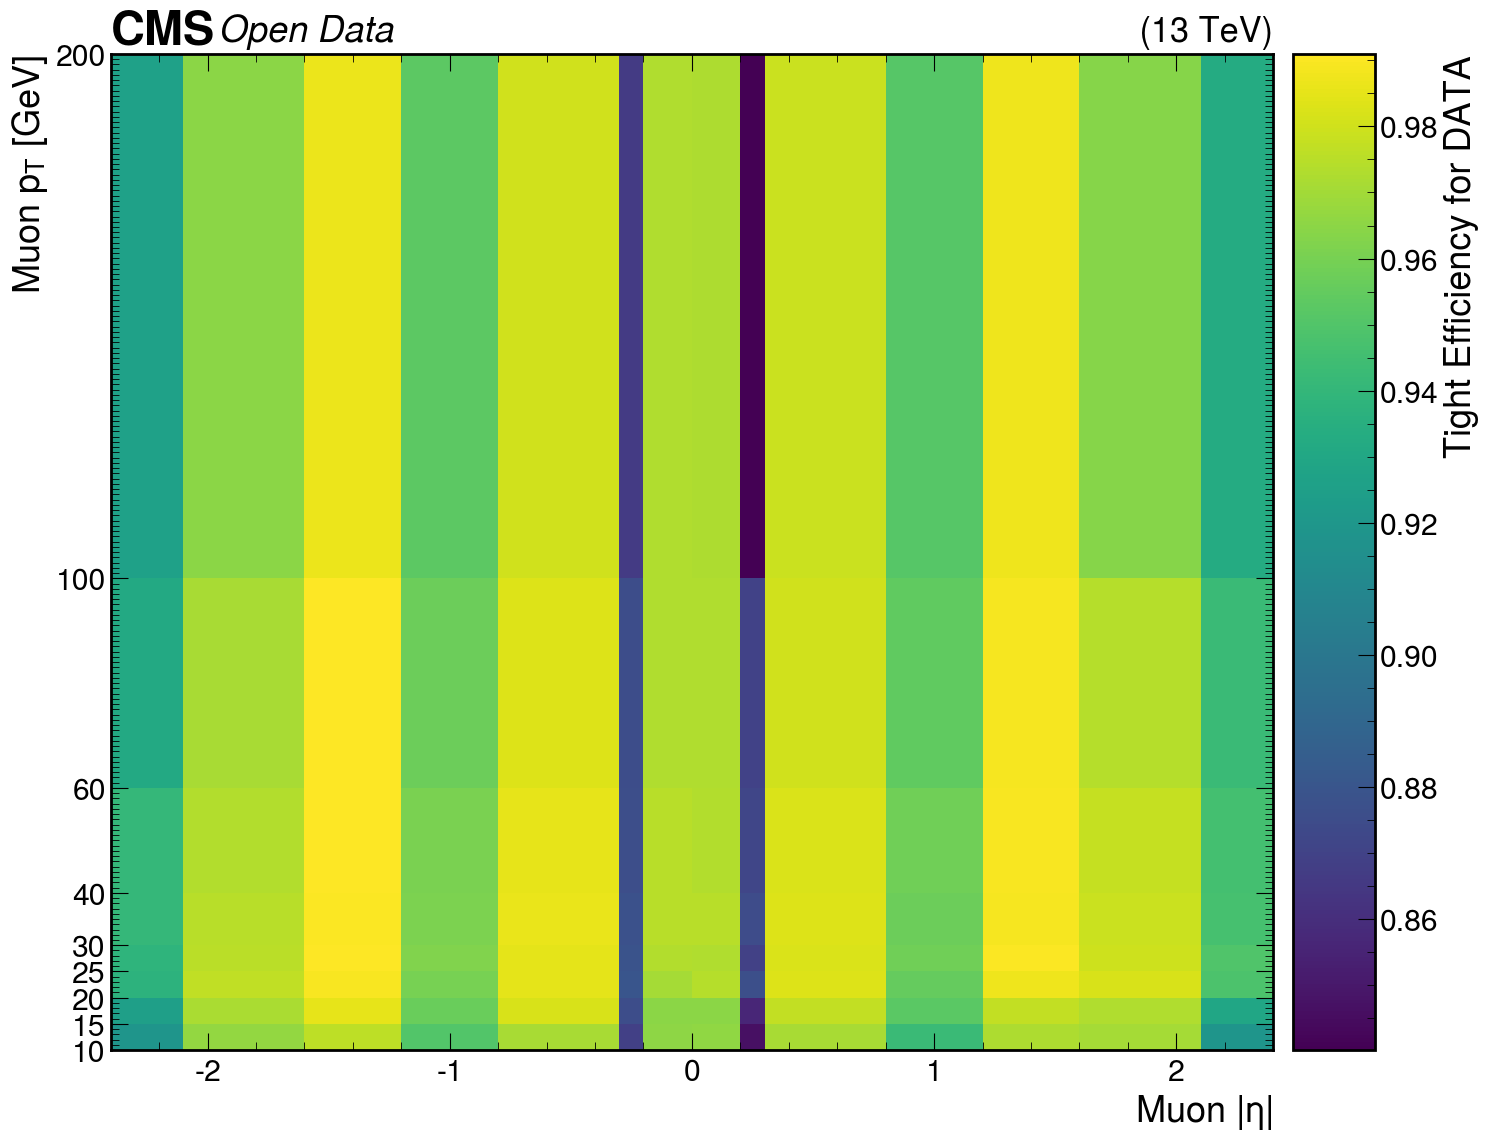

In [16]:
tight_eff_data = tight['NUM_TightHWW_DEN_TrackerMuons_eta_pt_efficiencyData'].to_hist()

fig, ax = plt.subplots(figsize=(15,12))

mesh = hep.hist2dplot(tight_eff_data,ax= ax, cbar = True, cmap= "viridis")
mesh.cbar.set_label("Tight Efficiency for DATA", loc = 'top')

hep.cms.label("Open Data", data = True, lumi = None, ax= ax)
# ax.set_xlabel()
ax.set_xlabel("Muon |$\\eta$|")
ax.set_ylabel("Muon $p_T$ [GeV]")

plt.tight_layout()
plt.show()

In [17]:

output_filename = "Muon_tight_effDATA.txt"

output_path = os.path.join(OUTPUT_DIR, output_filename)

os.makedirs(OUTPUT_DIR, exist_ok=True)

values = tight_eff_data.values()
eta_edges = tight_eff_data.axes[0].edges
pt_edges = tight_eff_data.axes[1].edges

with open(output_path, "w") as f:
    f.write(f"{'eta_low':>10} {'eta_high':>10} {'pt_low':>10} {'pt_high':>10} {'efficiency':>12}\n")
    
    for i in range(len(eta_edges) - 1):
        eta_low = eta_edges[i]
        eta_high = eta_edges[i+1]
        
        for j in range(len(pt_edges) - 1):
            pt_low = pt_edges[j]
            pt_high = pt_edges[j+1]
            
            eff = values[i, j]
            
            f.write(f"{eta_low:>10.3f} {eta_high:>10.3f} {pt_low:>10.1f} {pt_high:>10.1f} {eff:>12.6f}\n")

print(f"Successfully saved to: {output_path}")

Successfully saved to: /home/cms-jovyan/H-to-WW-NanoAOD-analysis/notebooks/Data-MC_corrections/Muon_tight_effDATA.txt


## Summary

All muon efficiency scale factors have been successfully extracted:

| Efficiency Type | Data File | MC File | Scale Factor |
|---|---|---|---|
| Isolation (ISO) | Muon_ISO_effDATA.txt | Muon_ISO_effMC.txt | eff_DATA / eff_MC |
| Tight ID | Muon_tight_effDATA.txt | Muon_tight_effMC.txt | eff_DATA / eff_MC |

These scale factors are 2D functions of muon (η, pT) and should be applied to Monte Carlo events in the subsequent analysis steps 
to account for differences between simulation and data.